# Linear Classification 

*Johnny Sreenan*

## Using Tweets to track natural disasters

News agencies, governments and corporations sometimes track social media during natural disasters to try to monitor unfolding events. But because no single person or group of people can read all available Twitter data, organizations may turn to natural language processing methods to try and understand what is happening as disasters unfold. 

While this approach is powerful, inferring events from NLP can be tricky. For instance, say a person [tweets](https://twitter.com/AnyOtherAnnaK/status/629195955506708480) that "LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE." This tweet includes the word "ablaze", which may signal to a computer that there is an unfolding disaster. However, in this particular case, the person is speaking metaphorically. A simple computer system using keywords (e.g. ablaze) might be fooled into thinking the tweet is reporting an actual fire.

I wanted to see if I could predict if a given tweet actually refers to a natural disaster. This work is motivated by real-world disaster monitoring systems.

__Note__: This dataset originally comes from [Kaggle](https://www.kaggle.com/c/nlp-getting-started/overview). 



## Getting started

perceptron and logistic regression in `sklearn`. implements stochastic gradient descent (SGD) for a variety of loss functions, including both perceptron and logistic regression, so this will be a way to easily move between the two classifiers.

In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

df_train = pd.read_csv('train.csv')

Y_train = df_train["target"]
text_train = df_train["text"]

vec = CountVectorizer()
X_train = vec.fit_transform(text_train)
feature_names = np.asarray(vec.get_feature_names())

df_test = pd.read_csv('test.csv')
Y_test = df_test["target"]
text_test = df_test["text"]

X_test = vec.transform(text_test)

print(df_train) 


      Unnamed: 0     id keyword location  \
0              0      1     NaN      NaN   
1              2      5     NaN      NaN   
2              3      6     NaN      NaN   
3              4      7     NaN      NaN   
4              5      8     NaN      NaN   
...          ...    ...     ...      ...   
6115        7607  10867     NaN      NaN   
6116        7608  10869     NaN      NaN   
6117        7609  10870     NaN      NaN   
6118        7611  10872     NaN      NaN   
6119        7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1     All residents asked to 'shelter in place' are ...       1  
2     13,000 people receive #wildfires evacuation or...       1  
3     Just got sent this photo from Ruby #Alaska as ...       1  
4     #RockyFire Update => California Hwy. 20 closed...       1  
...                                                 ...     ...  
6115  #st

C:\Users\jmsre\anacondav3\envs\DS\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Understand the data

The variables `df_train` and `df_test` are dataframes that store the training (and testing) datasets, which are contained in comma-separated files where the first column is the label and the second column is the text of the tweet.

The [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class converts the raw text into a bag-of-words into a feature vector representation that `sklearn` can use.

How many training instances are in the dataset? How many test instances?

**(6120, 1493)**

How many features are in the training data?

**5**

What is the distribution of labels in the training data? That is, what percentage of instances are about actual disasters?

**43.2%**

# Deliverable 1.1

In [60]:
print("There are",len(df_train),"training instances and",len(df_test),"testing instances in the dataset.")

There are 6120 training instances and 1493 testing instances in the dataset.


# Deliverable 1.2

In [61]:
Features = len(df_train.columns) - 1
print("There are",Features,"features in the training data.")

There are 5 features in the training data.


# Deliverable 1.3

In [62]:
target_inst = df_train["target"]
actual = 0
unrelated = 0
for i in range(len(target_inst)):
    if target_inst[i] == 1:
        actual +=1
    else:
        unrelated+=1

perc_inst= round(actual/(actual+unrelated)*100,2)
print("the percentage of instances that are about actual disasters is",str(perc_inst) + '%.')
# could use np.mean()

the percentage of instances that are about actual disasters is 43.2%.


## Perceptron

The code below trains an [`SGDClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) using the perceptron loss, then it measures the accuracy of the classifier on the test data, using `sklearn`'s [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function. 

The `fit` function trains the classifier. The feature weights are stored in the `coef_` variable after training. The `predict` function of the trained `SGDClassifier` outputs the predicted label for a given instance or list of instances.

Additionally, this code displays the features and their weights in sorted order, which you may want to examine to understand what the classifier is learning. In general, in binary classification, the 0 class is considered the "negative" class.

There are 3 keyword arguments that have been added to the code below. It is important you keep the same values of these arguments whenever you create an `SGDClassifier` instance in this assignment so that you get consistent results. They are:

- `max_iter` is one of the stopping criteria, which is the maximum number of iterations/epochs the algorithm will run for.

- `tol` is the other stopping criterion, which is how small the difference between the current loss and previous loss should be before stopping.

- `random_state` is a seed for pseudorandom number generation. The algorithm uses randomness in the way the training data are sorted, which will affect the solution that is learned, and even the accuracy of that solution.

Note: Even though there is only one minimum value of the loss, there may be different weights that result in the same loss, so randomness is a matter of tie-breaking. What's more, while different weights may have the same loss, they could lead to different classification accuracies, because the loss function is not the same as accuracy. (Unless accuracy was your loss function... which is possible, but uncommon because it turns out to be a difficult function to optimize.)
Note that different computers may still give different answers, despite keeping these settings the same, because of how pseudorandom numbers are generated with different operating systems and Python environments.*


In [63]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score

classifier = SGDClassifier(loss='perceptron', max_iter=100, tol=1.0e-12, random_state=123, eta0=100)
classifier.fit(X_train, Y_train)

print("Number of SGD iterations: %d" % classifier.n_iter_)
print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

print("\nFeature weights:")
args = np.argsort(classifier.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_names[a], classifier.coef_[0][a]))

Number of SGD iterations: 35
Training accuracy: 0.987908
Testing accuracy: 0.781648

Feature weights:
 zy3hpdjnwg: -0.7900
 qzlpfhpwdo: -0.6970
 better: -0.5112
 f7wqpcekg2: -0.5112
 sun: -0.5112
 t5trhjuau0: -0.5112
 august: -0.4647
 seat: -0.4647
 permanently: -0.4647
 desire: -0.4647
 hrqcjdovjz: -0.4647
 qzqc8wwwcn: -0.4647
 poll: -0.4647
 appears: -0.4182
 move: -0.4182
 full: -0.4182
 3yu26v19zh: -0.4182
 dlaub2nvtn: -0.4182
 jobs: -0.4182
 6gldwx71da: -0.4182
 scared: -0.4182
 song: -0.4182
 themselves: -0.3717
 used: -0.3717
 greenlacey: -0.3717
 booksbyroger: -0.3717
 l9mb2j5pxg: -0.3717
 myself: -0.3717
 zdj2hyf6ro: -0.3717
 wrong: -0.3717
 bags: -0.3717
 lot: -0.3717
 hands: -0.3717
 show: -0.3717
 x8moyevjsj: -0.3717
 m5djllxozp: -0.3717
 nzrwddlntp: -0.3717
 market: -0.3717
 mickinyman: -0.3717
 theatlantic: -0.3717
 esemjrn5cc: -0.3717
 lets: -0.3717
 ruin: -0.3717
 jlczidz7vu: -0.3717
 bejftygjil: -0.3717
 best: -0.3717
 long: -0.3717
 book: -0.3717
 wackoes: -0.3717
 ex

 hasåêarrived: -0.0929
 udqa53kfqu: -0.0929
 crosses: -0.0929
 greek: -0.0929
 hotnewscake: -0.0929
 rory: -0.0929
 req: -0.0929
 9z9hsmiavd: -0.0929
 pillows: -0.0929
 pointless: -0.0929
 doesnt: -0.0929
 wld: -0.0929
 philadelphia: -0.0929
 hxwfbpp1b3: -0.0929
 sjkgjxff2r: -0.0929
 twi3pym7us: -0.0929
 quicker: -0.0929
 unfml: -0.0929
 leandotorg: -0.0929
 qt8jmd9pi1: -0.0929
 contributing: -0.0929
 nfl: -0.0929
 targeted: -0.0929
 lungcancer: -0.0929
 permanent: -0.0929
 slew: -0.0929
 suzbkyw5tt: -0.0929
 lean: -0.0929
 molecularly: -0.0929
 roller: -0.0929
 gjbainqwn9: -0.0929
 wyou: -0.0929
 silver: -0.0929
 wbre: -0.0929
 unveiled: -0.0929
 robot_rainstorm: -0.0929
 huffman: -0.0929
 icc_realckt: -0.0929
 lining: -0.0929
 daughter: -0.0929
 ba: -0.0929
 development: -0.0929
 hem: -0.0929
 gl4mcax0ny: -0.0929
 applications: -0.0929
 jphgpl1c5x: -0.0929
 david: -0.0929
 jhvigsx5jg: -0.0929
 shipsxanchors: -0.0929
 omron: -0.0929
 barn: -0.0929
 idek: -0.0929
 michelleellle: -0.092

 joinvroom: -0.0465
 lind: -0.0465
 diversified: -0.0465
 ultimalucha: -0.0465
 auctions: -0.0465
 weyrey_gidi: -0.0465
 tw4rw: -0.0465
 4914njpio3: -0.0465
 luchaunderground: -0.0465
 weightless: -0.0465
 iartg: -0.0465
 coursing: -0.0465
 j2bone: -0.0465
 hangout: -0.0465
 costly: -0.0465
 writes4coffee: -0.0465
 hating: -0.0465
 lolo: -0.0465
 4kopkcyvtt: -0.0465
 di: -0.0465
 megan: -0.0465
 keegan172: -0.0465
 gpvzv0249y: -0.0465
 income: -0.0465
 domain: -0.0465
 kalle: -0.0465
 sophistication: -0.0465
 kaiseiw: -0.0465
 mcfaul: -0.0465
 cure: -0.0465
 lite: -0.0465
 vampiro: -0.0465
 meddling: -0.0465
 mccormick: -0.0465
 downside: -0.0465
 eeasterling_2: -0.0465
 dl60ja06tw: -0.0465
 dorling: -0.0465
 mattson: -0.0465
 daisy: -0.0465
 henley: -0.0465
 dk: -0.0465
 kindersley: -0.0465
 jamessnyder22: -0.0465
 vrpthvpymt: -0.0465
 60s: -0.0465
 ashghebranious: -0.0465
 tightly: -0.0465
 argentinean: -0.0465
 lifehacks: -0.0465
 nkkvknbvoz: -0.0465
 freeing: -0.0465
 sushi: -0.046

 3snyoohseq: 0.0000
 3sicroaanz: 0.0000
 superstition: 0.0000
 supernovalester: 0.0000
 superman: 0.0000
 waetkgsza9: 0.0000
 superfood: 0.0000
 superb: 0.0000
 adanne___: 0.0000
 wahhabism: 0.0000
 suppose: 0.0000
 aerospace: 0.0000
 aez3ak1lrn: 0.0000
 substance: 0.0000
 strictly: 0.0000
 3nkculgvmw: 0.0000
 stressing: 0.0000
 waltdisney: 0.0000
 agalloch: 0.0000
 aged: 0.0000
 strap: 0.0000
 aggarwal: 0.0000
 wamkre6ckd: 0.0000
 strand: 0.0000
 striker: 0.0000
 straits: 0.0000
 strain: 0.0000
 aggression: 0.0000
 wander: 0.0000
 agnivesh: 0.0000
 stormchase: 0.0000
 wank: 0.0000
 storey: 0.0000
 aguero: 0.0000
 stopharper: 0.0000
 stones: 0.0000
 aggressif: 0.0000
 strip: 0.0000
 stripped: 0.0000
 strips: 0.0000
 subsequent: 0.0000
 affecting: 0.0000
 submissions: 0.0000
 subjected: 0.0000
 affiliate: 0.0000
 su4zvwadj7: 0.0000
 stylist: 0.0000
 styled: 0.0000
 afk_10: 0.0000
 stury: 0.0000
 sturgis: 0.0000
 stupid_niggr: 0.0000
 afp: 0.0000
 stung: 0.0000
 african: 0.0000
 studying

 screamed: 0.0000
 homeowners: 0.0000
 alert: 0.0000
 10pm: 0.0000
 con: 0.0000
 rss: 0.0000
 stabbing: 0.0000
 christians: 0.0000
 notices: 0.0000
 stir: 0.0000
 richard: 0.0000
 mourning: 0.0000
 escaped: 0.0000
 ashes: 0.0000
 persons: 0.0000
 10th: 0.0000
 civil: 0.0000
 supply: 0.0000
 sends: 0.0000
 director: 0.0000
 realized: 0.0000
 razed: 0.0000
 trees: 0.0000
 admin: 0.0000
 earthquakes: 0.0000
 ha: 0.0000
 raiders: 0.0000
 rocky: 0.0000
 ns: 0.0000
 large: 0.0000
 condition: 0.0000
 falls: 0.0000
 town: 0.0000
 22: 0.0000
 lakes: 0.0000
 monitoring: 0.0000
 sue: 0.0000
 step: 0.0000
 department: 0.0000
 birds: 0.0000
 table: 0.0000
 through: 0.0000
 homeless: 0.0000
 rare: 0.0000
 firemen: 0.0000
 therapy: 0.0000
 100: 0.0000
 cant: 0.0000
 idk: 0.0000
 nigga: 0.0000
 holland: 0.0000
 record: 0.0000
 ohio: 0.0000
 chose: 0.0000
 1980: 0.0000
 review: 0.0000
 deadly: 0.0000
 pulling: 0.0000
 exchange: 0.0000
 taylor: 0.0000
 challenge: 0.0000
 en: 0.0000
 drones: 0.0000
 cabl

 intragenerational: 0.0929
 ran: 0.0929
 vulrclw7bd: 0.0929
 sandra: 0.0929
 lifted: 0.0929
 muazimus_prime: 0.0929
 infested: 0.0929
 township: 0.0929
 zyssobxntc: 0.0929
 siteinvestigating: 0.0929
 girardeau: 0.0929
 cape: 0.0929
 noranda: 0.0929
 bluff: 0.0929
 motion: 0.0929
 carbondale: 0.0929
 golem: 0.0929
 vjsaqpxngn: 0.0929
 osha: 0.0929
 kfvs12: 0.0929
 wrought: 0.0929
 pxyh7zo7vt: 0.0929
 corp: 0.0929
 csx: 0.0929
 dj1lwznieh: 0.0929
 stonewall: 0.0929
 5kfovovjso: 0.0929
 markoturner: 0.0929
 theatershooting: 0.0929
 consent: 0.0929
 holodomor: 0.0929
 defendant: 0.0929
 annaciclismo: 0.0929
 spectacular: 0.0929
 select: 0.0929
 notice: 0.0929
 jury: 0.0929
 rainfall: 0.0929
 65xr1p9soo: 0.0929
 meg: 0.0929
 frontlines: 0.0929
 hyderabad: 0.0929
 result: 0.0929
 nmfsgkf1za: 0.0929
 testify: 0.0929
 9viibxgjav: 0.0929
 vn2fnmy7li: 0.0929
 avwe1lbvhn: 0.0929
 mccainenl: 0.0929
 busines: 0.0929
 exam: 0.0929
 erected: 0.0929
 abuses: 0.0929
 efak: 0.0929
 tydxauuenq: 0.0929
 t

#### linearly separable?
**Yes. After increasing and decreasing the iterations of the training set I can tell that the training set is mostly linearly separable, around 98.8% accuracy with about 1.2% error. The training set seems to converge around around 35 iterations.**

#### Important features?

**It seems like the feature name that increases the likelihood of a tweet refering to natural disaster is 'earthquake' with a weight of 1.25. It seems like 'zy3hpdjnwg' in a tweet is the least likely to refer to a natural disaster.**

#### Averging weight vectors
take an average of the weight vectors learned at different iterations of the algorithm, rather than only using the final weights that minimize the loss. That is, calculate $\bar{\mathbf{w}} = \sum_{t=1}^T \mathbf{w}^{(t)}$ where $\mathbf{w}^{(t)}$ is the weight vector at iteration $t$ of the algorithm and $T$ is the number of iterations, and then use $\bar{\mathbf{w}}$ when making classifications on new data.

To use this technique, add the keyword argument `average=True` to the `SGDClassifier` function. 

In [64]:
#Average = True - average value of the coefficients across all updates
avg_classifier = SGDClassifier(loss='perceptron', max_iter=1000, tol=1.0e-12, random_state=123, eta0=100, average=True)
avg_classifier.fit(X_train, Y_train)

print("Number of SGD iterations: %d" % classifier.n_iter_)
print("Training accuracy: %0.6f" % accuracy_score(Y_train, avg_classifier.predict(X_train)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, avg_classifier.predict(X_test)))

print("\nFeature weights:")
args = np.argsort(avg_classifier.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_names[a], avg_classifier.coef_[0][a]))

Number of SGD iterations: 35
Training accuracy: 0.977124
Testing accuracy: 0.811788

Feature weights:
 full: -1.6394
 sun: -1.3797
 better: -1.3130
 also: -1.3088
 book: -1.2684
 bags: -1.2583
 jobs: -1.2384
 lot: -1.1827
 poll: -1.1422
 desire: -1.1287
 myself: -1.1173
 seat: -1.1141
 ebay: -1.1134
 qzlpfhpwdo: -1.1032
 zy3hpdjnwg: -1.0959
 upheaval: -1.0772
 finally: -1.0624
 long: -1.0453
 australia: -1.0284
 ruin: -1.0130
 market: -0.9818
 super: -0.9804
 lets: -0.9721
 sale: -0.9707
 blew: -0.9702
 deluge: -0.9698
 stock: -0.9661
 head: -0.9637
 show: -0.9635
 6aug: -0.9628
 join: -0.9410
 hands: -0.9295
 quiz: -0.9254
 miss: -0.9213
 fun: -0.9199
 friend: -0.9140
 stage: -0.9132
 emmerdale: -0.9121
 self: -0.9046
 nice: -0.8990
 welcome: -0.8969
 online: -0.8962
 wrong: -0.8939
 forbes: -0.8918
 traumatised: -0.8906
 song: -0.8882
 emotional: -0.8881
 sit: -0.8804
 such: -0.8795
 career: -0.8745
 ball: -0.8728
 facebook: -0.8715
 jeb: -0.8663
 august: -0.8655
 appears: -0.8652
 n

 shakespeare: -0.2121
 c7rco2emwf: -0.2119
 forgiving: -0.2119
 alcoholism: -0.2119
 31tgtlz3ya: -0.2119
 southridgelife: -0.2117
 soooo: -0.2117
 pumped: -0.2117
 s0ktiliskq: -0.2115
 arabic: -0.2115
 vietnamese: -0.2115
 breaks: -0.2114
 portgassdk: -0.2114
 bod: -0.2114
 ûªll: -0.2114
 katiekatcubs: -0.2112
 m8: -0.2112
 brown: -0.2110
 itself: -0.2110
 alekalicante: -0.2110
 imsushickoflove: -0.2110
 gauze: -0.2110
 shay: -0.2108
 cosima: -0.2108
 merycormier: -0.2108
 saddlebrooke: -0.2108
 connormidd: -0.2106
 krsy54xmmc: -0.2106
 mprnews: -0.2106
 breaches: -0.2106
 yn6nxoucr1: -0.2106
 ek6kyhxpe9: -0.2106
 ooohshit: -0.2105
 ooooohshit: -0.2105
 trombonetristan: -0.2105
 keegan172: -0.2105
 trump2016: -0.2105
 xvaoqo4egr: -0.2105
 donzilla: -0.2105
 establishment: -0.2105
 overtime: -0.2105
 haley: -0.2101
 oobscfoktq: -0.2101
 richardson: -0.2101
 lu: -0.2101
 nz: -0.2100
 hugomatz: -0.2100
 0ajisa5531: -0.2100
 parisian: -0.2096
 accustomed: -0.2096
 ejkrf8n8a8: -0.2095
 dfr:

 moblin: -0.1046
 kinggerudo_: -0.1046
 state: -0.1045
 eswnsetftf: -0.1042
 lilithsaintcrow: -0.1042
 3967: -0.1039
 pop: -0.1038
 hxox7o42rq: -0.1038
 g7s34sw2am: -0.1035
 stoponesounds: -0.1035
 airwaves: -0.1035
 radios: -0.1035
 95roots: -0.1035
 stickynyc: -0.1035
 wb8awoblcl: -0.1034
 ur7fexszg4: -0.1034
 tenshi: -0.1033
 yuki: -0.1033
 daughterofnai: -0.1033
 shortfalls: -0.1033
 represents: -0.1033
 cap: -0.1033
 battleroyalemod: -0.1032
 decides: -0.1032
 teleported: -0.1032
 jerseys: -0.1032
 nruzhr5xqu: -0.1032
 mentally: -0.1031
 log: -0.1031
 brento_bento: -0.1030
 capicapricapri: -0.1030
 wha: -0.1030
 surfers: -0.1029
 czdw8oowa2: -0.1029
 waimea: -0.1029
 driller: -0.1029
 snipe: -0.1029
 8960: -0.1029
 slqnph34nt: -0.1029
 boxed: -0.1029
 exact: -0.1027
 scrolling: -0.1027
 jtw: -0.1026
 ceiao1texr: -0.1026
 deny: -0.1024
 safer: -0.1023
 rap: -0.1023
 nonprofit: -0.1023
 h1xch54kd3: -0.1023
 ueppjwvlcb: -0.1022
 watersafety: -0.1022
 posting: -0.1020
 credit: -0.1019

 partner: 0.0000
 sirensicebreaker: 0.0000
 bumper: 0.0000
 sirius: 0.0000
 ars: 0.0000
 poignant: 0.0000
 pogo: 0.0000
 bumzvmwam3: 0.0000
 siskiyou: 0.0000
 pochette: 0.0000
 poc: 0.0000
 bunting: 0.0000
 po19h8ycnd: 0.0000
 buren: 0.0000
 arrives: 0.0000
 pnnunrnqja: 0.0000
 pnlucerp0x: 0.0000
 burger: 0.0000
 pmxezuo4ay: 0.0000
 pmlohzurwr: 0.0000
 pol: 0.0000
 arrests: 0.0000
 siren_song21: 0.0000
 bullpen: 0.0000
 arwx: 0.0000
 buddha: 0.0000
 popcorn: 0.0000
 sincerelyevelnn: 0.0000
 buff: 0.0000
 artillery: 0.0000
 singing: 0.0000
 buffoonmike: 0.0000
 pone: 0.0000
 articals: 0.0000
 singled: 0.0000
 arti: 0.0000
 bukidnon: 0.0000
 bullet: 0.0000
 bulletin: 0.0000
 sinkingshipindy: 0.0000
 sioux: 0.0000
 siouxlan: 0.0000
 siouxland: 0.0000
 sip: 0.0000
 bucks: 0.0000
 pmggavtokp: 0.0000
 pmcp8czpnd: 0.0000
 arizonadot: 0.0000
 arin: 0.0000
 planners: 0.0000
 buthidaung: 0.0000
 skippy6gaming: 0.0000
 plank: 0.0000
 planing: 0.0000
 skirt: 0.0000
 skqpwsnoin: 0.0000
 ariana: 0.0

 talent: 0.0931
 plot: 0.0931
 comes: 0.0937
 homeowners: 0.0938
 enrt: 0.0938
 mylieruxk1: 0.0938
 skaggs: 0.0938
 solano: 0.0938
 sr37: 0.0938
 1141: 0.0938
 tq1ruqd4lg: 0.0943
 usnwsgov: 0.0943
 40pm: 0.0943
 path: 0.0947
 6g49ywwsqj: 0.0952
 claiming: 0.0952
 banthebomb: 0.0952
 jiomnrcygt: 0.0953
 transformation: 0.0956
 dragon: 0.0956
 lockdown: 0.0957
 peeps: 0.0957
 rumor: 0.0957
 rutherford: 0.0957
 posts: 0.0958
 giesomgwtr: 0.0964
 somehow: 0.0967
 pastor: 0.0968
 approves: 0.0968
 association: 0.0968
 directors: 0.0968
 tdaktglu5p: 0.0969
 frenzy: 0.0969
 disorder: 0.0969
 catovitch: 0.0969
 unprecedented: 0.0969
 astounding: 0.0969
 mania: 0.0969
 tribe: 0.0971
 bzkqpl6r0a: 0.0972
 acute: 0.0972
 undetected: 0.0972
 precedent: 0.0972
 bolshevik: 0.0975
 hunhry: 0.0975
 seize: 0.0975
 0xouv7dhwz: 0.0975
 monopolized: 0.0975
 katunews: 0.0979
 p0gos5urxg: 0.0979
 slows: 0.0979
 horse: 0.0984
 dropped: 0.0985
 surely: 0.0987
 370: 0.0987
 vfbw3nyo9l: 0.0987
 ranking: 0.0988
 

 crushes: 0.2635
 meals: 0.2635
 storms: 0.2636
 parade: 0.2642
 acts: 0.2643
 twi: 0.2644
 ryeqmxirj8: 0.2644
 manchesterlite: 0.2644
 riyadh: 0.2644
 donald: 0.2644
 racist: 0.2644
 latinos: 0.2644
 7nagdsadwp: 0.2644
 remark: 0.2644
 osbourne: 0.2644
 suffield: 0.2648
 bptmlf4p10: 0.2648
 possibility: 0.2649
 anybody: 0.2649
 fdx: 0.2650
 2kdq56xtws: 0.2650
 nyse: 0.2650
 packages: 0.2650
 cafetiere: 0.2650
 crockery: 0.2650
 term: 0.2656
 testa: 0.2657
 htarvrgly: 0.2657
 divers: 0.2657
 distinction: 0.2657
 gander: 0.2659
 nlwx: 0.2659
 convection: 0.2659
 spits: 0.2659
 outflow: 0.2659
 debt: 0.2659
 coworker: 0.2660
 pandora: 0.2660
 vzcvadkcqp: 0.2660
 nursing: 0.2660
 guatemala: 0.2664
 sewing: 0.2664
 savings: 0.2664
 tl93aod3er: 0.2664
 technical: 0.2664
 intensive: 0.2664
 dart: 0.2664
 participating: 0.2664
 quem: 0.2666
 lembra: 0.2666
 30stm: 0.2666
 expert: 0.2666
 iecc1jdoub: 0.2666
 scientists: 0.2667
 l0deocxu6o: 0.2667
 inbounds: 0.2667
 nats: 0.2667
 nl: 0.2667
 bo

**It seems like after implementing averages across all updates, it decreases the training accuracy, increases the testing accuracy, and allowed for the weights to be further away from zero. it also seems like there is more accurate word chunking. This is helpful because you don't make huge changes in model from one instance, because it could be an outlier. this is a way to "smooth over" each instance. This is a method to avoid overfitting.**

## Logistic regression

create a new `SGDClassifier`, this time setting the `loss` argument to `'log'`, which will train a logistic regression classifier. Set `average=False` for the remaining problems.

Use the `predict` function to get the classifications, as with perceptron. You can get the probabilities by calling the `predict_proba` function. This will give a list of two numbers; the first is the probability that the class is $0$ and the second is the probability that the class is $1$.

For the first task, add the keyword argument `alpha` to the `SGDClassifier` function. This is the regularization strength, called $\lambda$ in lecture. 

Calculate the training and testing accuracy when `alpha` is one of $[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]$. Create a plot where the x-axis is `alpha` and the y-axis is accuracy, with two lines (one for training and one for testing). Use [a log scale for the x-axis](https://matplotlib.org/examples/pylab_examples/log_demo.html) so that the `alpha` values are spaced evenly.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

score_so_far = []
test_score_so_far = []
test_lst = []
train_lst = []

alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
# alpha=alpha,
for alpha in alphas:
    
    classifier = SGDClassifier(loss='log_loss', max_iter=1000, alpha = alpha,
                               tol=1.0e-12, random_state=123, eta0=100, average=False)
    test_classifier = SGDClassifier(loss='log_loss', max_iter=1000, alpha = alpha,
                               tol=1.0e-12, random_state=123, eta0=100, average=False)

    test_classifier.fit(X_test, Y_test)
    classifier.fit(X_train, Y_train)
    
    test_accuracy = test_classifier.score(X_test,Y_test)
    accuracy = classifier.score(X_train,Y_train)
    
    score_so_far.append(accuracy)
    test_score_so_far.append(test_accuracy)
    

    training_acc = accuracy_score(Y_train, classifier.predict(X_train))
    testing_acc = accuracy_score(Y_test, classifier.predict(X_test))
    
    print("Training accuracy: %0.6f" % training_acc)
    print("Testing accuracy: %0.6f" % testing_acc)
    print("Test:",classifier.predict_proba(X_test))
    print("Train:",classifier.predict_proba(X_train))
    
    test_lst.append(testing_acc)
    train_lst.append(training_acc)
    
# print(alphas)    


#     for a in args:
#     print(" %s: %0.4f" % (feature_names[a], avg_classifier.coef_[0][a]))

Training accuracy: 0.983333
Testing accuracy: 0.807770
Test: [[0.01498214 0.98501786]
 [0.69230848 0.30769152]
 [0.96509069 0.03490931]
 ...
 [0.01439543 0.98560457]
 [0.26013021 0.73986979]
 [0.07614149 0.92385851]]
Train: [[0.1073517  0.8926483 ]
 [0.07474336 0.92525664]
 [0.04847949 0.95152051]
 ...
 [0.00976061 0.99023939]
 [0.04878059 0.95121941]
 [0.00382533 0.99617467]]
Training accuracy: 0.901634
Testing accuracy: 0.813798
Test: [[0.14055191 0.85944809]
 [0.54671363 0.45328637]
 [0.82246309 0.17753691]
 ...
 [0.08647511 0.91352489]
 [0.54004786 0.45995214]
 [0.26373518 0.73626482]]
Train: [[0.35321656 0.64678344]
 [0.16869801 0.83130199]
 [0.13702526 0.86297474]
 ...
 [0.03844073 0.96155927]
 [0.18279678 0.81720322]
 [0.03216899 0.96783101]]
Training accuracy: 0.808660
Testing accuracy: 0.773610
Test: [[0.36860985 0.63139015]
 [0.49684802 0.50315198]
 [0.63304806 0.36695194]
 ...
 [0.28922819 0.71077181]
 [0.71122701 0.28877299]
 [0.41045013 0.58954987]]
Train: [[0.53629373 0.4

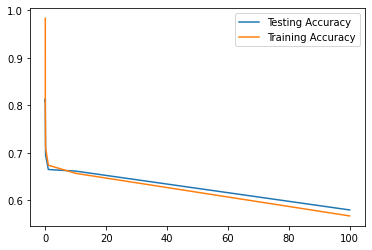

In [66]:
plt.plot(alphas, test_lst,label='Testing Accuracy')
plt.plot(alphas, train_lst,label='Training Accuracy')
plt.legend()
plt.show()


**After using the 'predict_proba' function I found that as alpha gets higher, the odds of there being a 1 or 0 start to move towards 50% each. Along with this the testing accuracy of the dataset goes down. I think this happens because when alpha grows too high, it also decreases the weights in the regularization. This could lead to an individual feature dominating the prediction rather than incorporating many features.**

#### Learning rate
For this task, add the keyword argument `learning_rate` to the `SGDClassifier` function and set the value to `invscaling`. This defines the learning rate at iteration $t$ as: $\eta_t = \frac{\eta_0}{t^a}$, where $\eta_0$ and $a$ are both arguments you have to define in the `SGDClassifier` function, called `eta0` and `power_t`, respectively. 

#### Deliverable 3.3: 

number of iterations for values of `eta0` in $[10.0, 100.0, 1000.0, 10000.0]$ and values of `power_t` in $[0.5, 1.0, 2.0]$.  **177**

| `eta0`   | `power_t` | # Iterations |
|-----------:|-----------|--------------|
| $10.0$    | $0.5$     |              |
| $10.0$    | $1.0$     |              |
| $10.0$    | $2.0$     |              |
| $100.0$   | $0.5$     |              |
| $100.0$   | $1.0$     |              |
| $100.0$   | $2.0$     |              |
| $1000.0$  | $0.5$     |              |
| $1000.0$  | $1.0$     |              |
| $1000.0$  | $2.0$     |              |
| $10000.0$ | $0.5$     |              |
| $10000.0$ | $1.0$     |              |
| $10000.0$ | $2.0$     |              |

# Deliverable 3.2.1 / 3.3

In [67]:
import itertools
#https://www.delftstack.com/howto/python/how-to-loop-through-multiple-lists-in-python/#use-zip-to-iterate-through-two-lists-with-different-lengths
alpha_so_far = []
score_so_far = []
eta = [10.0,100.0,1000.0,10000.0]
power_t = [0.5,1.0,2.0]

for eta, pt in zip(eta,power_t):
    print(eta, pt)
    classifier = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate = "invscaling",
                               tol=1.0e-12, random_state=123, eta0=eta, average=False, power_t = pt)
    classifier.fit(X_train, Y_train)
    accuracy = classifier.score(X_train,Y_train)
    
    alpha_so_far.append(alpha) 
    score_so_far.append(accuracy)
    
    print("Training accuracy: %0.6f" % accuracy_score(Y_train, classifier.predict(X_train)))
    print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))
    print("Test:",classifier.predict_proba(X_test))
    print("Train:",classifier.predict_proba(X_train))
    print("Number of SGD iterations: %d" % classifier.n_iter_)
    
#     plt.plot(score, accuracy_score(Y_test, classifier.predict(X_test)))


10.0 0.5
Training accuracy: 0.981699
Testing accuracy: 0.809779
Test: [[0.01299277 0.98700723]
 [0.56003992 0.43996008]
 [0.92768925 0.07231075]
 ...
 [0.01069756 0.98930244]
 [0.32598978 0.67401022]
 [0.06540215 0.93459785]]
Train: [[0.1021078  0.8978922 ]
 [0.06810092 0.93189908]
 [0.02415555 0.97584445]
 ...
 [0.00465138 0.99534862]
 [0.08051442 0.91948558]
 [0.00250132 0.99749868]]
Number of SGD iterations: 177
100.0 1.0


C:\Users\jmsre\anacondav3\envs\DS\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Training accuracy: 0.639379
Testing accuracy: 0.602143
Test: [[2.15431770e-06 9.99997846e-01]
 [1.00000000e+00 1.97479441e-30]
 [9.38294157e-01 6.17058426e-02]
 ...
 [2.90069995e-08 9.99999971e-01]
 [9.99971582e-01 2.84182380e-05]
 [1.00000000e+00 8.33198171e-45]]
Train: [[1.00000000e+00 2.65060714e-53]
 [1.17901531e-03 9.98820985e-01]
 [0.00000000e+00 1.00000000e+00]
 ...
 [1.00000000e+00 3.33343547e-60]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]]
Number of SGD iterations: 1000
1000.0 2.0
Training accuracy: 0.582680
Testing accuracy: 0.572672
Test: [[0.9813387  0.0186613 ]
 [1.         0.        ]
 [0.98642891 0.01357109]
 ...
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]]
Train: [[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Number of SGD iterations: 1000


C:\Users\jmsre\anacondav3\envs\DS\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### `eta0` and `power_t` affect the learning rate based on the formula

**I noticed that as eta and power_t increased, the training and testing accuracy would decrease. However it was still able to converge after 177 iterations. I think it relates to the table because you can see how the values are correlated as you increase the iterations. Eventually the model is giving out probabilities that are "certain" or close to certain, although it sacrifices accuracy.**
  
#### positive probability

remove the `learning_rate`, `eta0`, and `power_t` arguments so that the learning rate returns to the default setting. For this final task, we will experiment with how high the probabiity must be before an instance is classified as positive.


In [68]:

def threshold(probs, tau):
    return np.where(probs[:,1] > tau, 1, 0)
x_tau = []
y_prec = []
# logistic regression  
for tau in [0.5,0.6,0.7,0.8,0.9,0.95,0.99]:
    x_tau.append(tau)
    classifier = SGDClassifier(loss='log_loss', max_iter=1000, tol=1.0e-12, random_state=123)
    classifier.fit(X_train, Y_train)
    precision = precision_score(Y_train, threshold(classifier.predict_proba(X_train),tau))
    y_prec .append(precision)
    print("Precision score: {} tau: {} ".format(precision,tau))

Precision score: 0.995323460639127 tau: 0.5 
Precision score: 0.9967935871743487 tau: 0.6 
Precision score: 0.99830220713073 tau: 0.7 
Precision score: 0.9990489776509748 tau: 0.8 
Precision score: 1.0 tau: 0.9 
Precision score: 1.0 tau: 0.95 
Precision score: 1.0 tau: 0.99 


#### Deliverable 3.5

Calculate the testing precision when the value of `tau` for thresholding is one of $[0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]$. Create a plot where the x-axis is `tau` and the y-axis is precision.


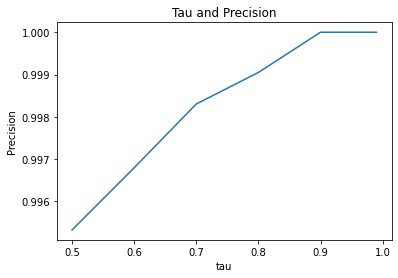

In [69]:
plt.title('Tau and Precision')
plt.xlabel('tau')
plt.ylabel('Precision')
plt.plot(x_tau,y_prec)
plt.show()


**As the threshold increases you can also see that the precision increases. This is because as tau increases so does the chance of correctly classification.**

## Sparse learning 

Add the `penalty` argument to `SGDClassifier` and set the value to `'l1'`, which tells the algorithm to use L1 regularization instead of the default L2. L1 regularization encourages weights to stay at exactly $0$, resulting in a more "sparse" model than L2. You should see this effect if you examine the values of `classifier.coef_`.

#### Write a function to calculate the number of features whose weights are nonzero when using L1 regularization. Calculate the number of nonzero feature weights when `alpha` is one of $[0.00001, 0.0001, 0.001, 0.01, 0.1]$. Create a plot where the x-axis is `alpha` and the y-axis is the number of nonzero weights, using a log scale for the x-axis.

[your solution should be plotted below]

In [70]:

def countFeatures():
    sin_lst = []
    nonZero = []
    non_zero_len = []
    nonZero_ = []
    non_zero_len_ = []
    alphas = [0.00001,0.0001,0.001,0.01,0.1]
    for alpha in alphas:
        classifier = SGDClassifier(loss='log_loss', max_iter=1000,
                                tol=1.0e-12, random_state=123,
                                penalty = 'l1',alpha = alpha,eta0=100, average=False)
        test_classifier = SGDClassifier(loss='log_loss', max_iter=1000, alpha=alpha,
                               tol=1.0e-12, random_state=123, eta0=100, average=False)
    
        test_classifier.fit(X_test, Y_test)
        classifier.fit(X_train, Y_train)
        
#         test_accuracy = test_classifier.score(X_test,Y_test)
#         accuracy = classifier.score(X_train,Y_train)
        training_acc = accuracy_score(Y_train, classifier.predict(X_train))
        testing_acc = accuracy_score(Y_test, classifier.predict(X_test))
        
        for i in classifier.coef_:
            for j in i:
#                 print(j)
                if j != 0:
#                     print(i[count])
#                     print("\n")
                    temp = j
                    nonZero.append(temp)
                    
                else:
                    pass
        non_zero_len.append(len(nonZero))
        for i in test_classifier.coef_:
            for j in i:
#                 print(j)
                if j != 0:
#                     print(i[count])
#                     print("\n")
                    temp = j
                    nonZero_.append(temp)
                    
                else:
                    pass
        non_zero_len_.append(len(nonZero))
#     print(nonZero)   
    plt.title('Non-Zero weights')
    plt.xlabel('alpha')
    plt.ylabel('Non-Zero weights')
    plt.semilogx(alpha,np.sin(2*np.pi*alpha))

    plt.plot(alphas, non_zero_len, 'r-',label='Training Accuracy') 
    plt.plot(alphas, non_zero_len_,'g-',label='Testing Accuracy') 

    plt.legend()
    plt.show()

        

C:\Users\jmsre\anacondav3\envs\DS\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


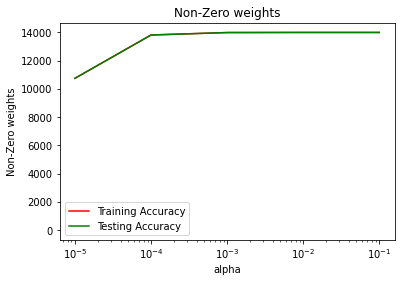

In [71]:
countFeatures()